# Linear Regression using Scikit-Learn

There is an open-source, commercially usable machine learning toolkit called [scikit-learn](https://scikit-learn.org/stable/index.html). This toolkit contains implementations of many of the algorithms that you will work with in this course.

## Goals

- Utilize  scikit-learn to implement linear regression using Gradient Descent

In [1]:
import numpy as np
np.set_printoptions(precision=2)
import pandas as pd

np.set_printoptions(precision=2) 是NumPy库中用于设置打印选项的函数之一。在这个特定的例子中，通过 precision=2 参数，设置了浮点数的输出精度为小数点后两位。

In [2]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Dataset

In [3]:
data = pd.read_csv("data/houses.txt", header=None, 
                   names=['Size(sqft)', 'Bedrooms', 
                          'floors', 'Age', 
                          'Price(1000s dollars)'])

df = pd.DataFrame(data)

df

,Size(sqft),Bedrooms,floors,Age,Price(1000s dollars)
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0
...,...,...,...,...,...
95,1224.0,2.0,2.0,12.0,329.0
96,1432.0,2.0,1.0,43.0,388.0
97,1660.0,3.0,2.0,19.0,390.0
98,1212.0,3.0,1.0,20.0,356.0


In [4]:
X_train = df.iloc[:,:4]
X_train

,Size(sqft),Bedrooms,floors,Age
0,952.0,2.0,1.0,65.0
1,1244.0,3.0,1.0,64.0
2,1947.0,3.0,2.0,17.0
3,1725.0,3.0,2.0,42.0
4,1959.0,3.0,2.0,15.0
...,...,...,...,...
95,1224.0,2.0,2.0,12.0
96,1432.0,2.0,1.0,43.0
97,1660.0,3.0,2.0,19.0
98,1212.0,3.0,1.0,20.0


In [5]:
y_train = df.iloc[:, 4]
y_train

0     271.5
1     300.0
2     509.8
3     394.0
4     540.0
      ...  
95    329.0
96    388.0
97    390.0
98    356.0
99    257.8
Name: Price(1000s dollars), Length: 100, dtype: float64

# Gradient Descent

Scikit-learn has a **gradient descent regression model** [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#examples-using-sklearn-linear-model-sgdregressor).  Like your previous implementation of gradient descent, this model performs best with **normalized inputs**. [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) will perform z-score normalization as in a previous lab. Here it is referred to as 'standard score'.

### Scale/normalize the training data

In [6]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw.\n{np.ptp(X_train, axis = 0)}")
print(f"\n Peak to Peak range by column in Normalized.\n{np.ptp(X_norm, axis = 0)}")

Peak to Peak range by column in Raw.
[2.41e+03 4.00e+00 1.00e+00 9.50e+01]

 Peak to Peak range by column in Normalized.
[5.84 6.13 2.06 3.68]


### Create and fit the regression model

In [7]:
sgdr = SGDRegressor(max_iter = 1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 128, number of weight updates: 12801.0


### View parameters
Note, the parameters are associated with the *normalized* input data. The fit parameters are very close to those found in the previous lab with this data.

In [8]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"Model parameters: w_norm = {w_norm}, b_norm = {b_norm}")
print("\nModel parameters from previous project b_3_FeatureScaling_LearningRate:")
print("Itertaion = 999\nw = [1.1e+02, -2.1e+01, -3.3e+01, -3.8e+01]\nb = 3.6e+02\nJ_w_b = 2.19711e+02")

Model parameters: w_norm = [110.24 -21.29 -32.45 -37.86], b_norm = [362.23]

Model parameters from previous project b_3_FeatureScaling_LearningRate:
Itertaion = 999
w = [1.1e+02, -2.1e+01, -3.3e+01, -3.8e+01]
b = 3.6e+02
J_w_b = 2.19711e+02


### Make predictions
Predict the targets of the training data. Use both the `predict` routine and compute using $w$ and $b$.

In [9]:
# make a predicton using sgdr.predict()
y_pred_sgdr = sgdr.predict(X_norm)
# make a prediction using np.dot()
y_pred = np.dot(X_norm, w_norm) + b_norm
print(f"prediction using np.dot() and sgdr.predict match:{(y_pred == y_pred_sgdr).all()}")

prediction using np.dot() and sgdr.predict match:True


In [10]:
print(f"Prediction on training set:\n{y_pred_sgdr[:4]}")
print(f"Prediction on training set:\n{y_pred[:4]}")
print(f"Target values:\n{y_train[:4]}")

Prediction on training set:
[248.62 295.56 485.73 389.65]
Prediction on training set:
[248.62 295.56 485.73 389.65]
Target values:
0    271.5
1    300.0
2    509.8
3    394.0
Name: Price(1000s dollars), dtype: float64


### Plot Results
Let's plot the predictions versus the target values.

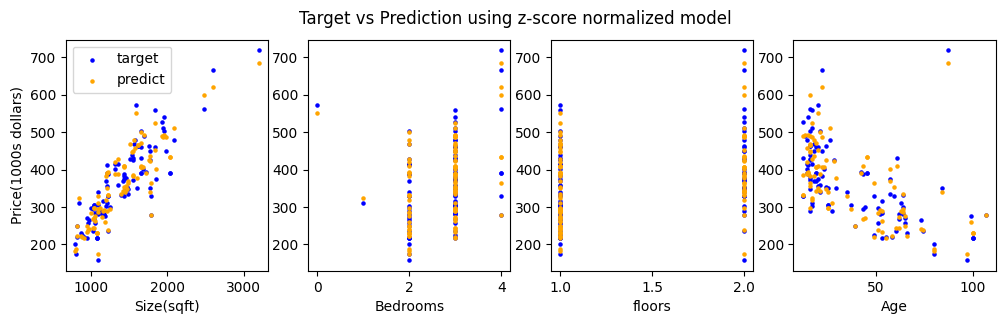

In [11]:
fig, ax = plt.subplots(1, 4, figsize = (12, 3))

for i in range(len(ax)):
    
    ax[i].scatter(X_train.iloc[:,i], y_train, label = "target", color = "blue", s = 5)
    
    ax[i].set_xlabel(X_train.columns[i])
    
    ax[i].scatter(X_train.iloc[:,i], y_pred, label = "predict", color = "orange", s = 5)
    
ax[0].set_ylabel("Price(1000s dollars)")
ax[0].legend()
fig.suptitle("Target vs Prediction using z-score normalized model")
plt.show()

# What we learned

- utilized an open-source machine learning toolkit, scikit-learn
- implemented linear regression using gradient descent and feature normalization from that toolkit

# REFERENCE

[1]https://github.com/Thomson-Cui/2022-Machine-Learning-Specialization/blob/main/Supervised%20Machine%20Learning%20Regression%20and%20Classification/week2/3.Gradient%20descent%20in%20practice/C1_W2_Lab05_Sklearn_GD_Soln.ipynb

[2]https://www.bilibili.com/video/BV1Pa411X76s/?p=30&spm_id_from=333.880.my_history.page.click&vd_source=8c32dd2bfbfecb1eaa9b0b9c4fb4d83e

[3]https://www.coursera.org/specializations/machine-learning-introduction